<a href="https://colab.research.google.com/github/Farah-Abdelkefi/DL_Labs/blob/main/DL_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_circles, make_blobs
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

# Dataset

In [ ]:
X, y = make_circles(n_samples=1000, noise=0.03)

In [ ]:
X.shape

(1000, 2)

In [ ]:
y.shape

(1000,)

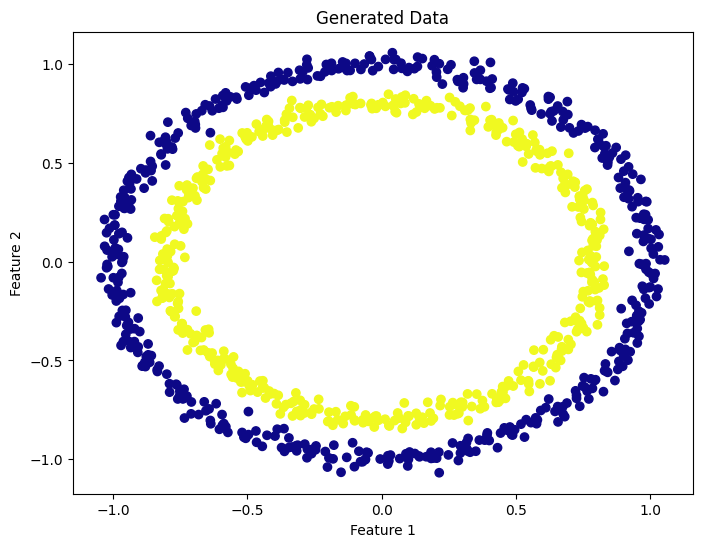

In [ ]:
# c. Visualiser les données
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma')
plt.title('Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Les données sont générées en cercles, elles nécessitent une fonction non linéaire pour séparer les classes.
     

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Dimensions de l'ensemble d'apprentissage (X_train) :", X_train.shape)
print("Dimensions de l'ensemble de test (X_test) :", X_test.shape)
print("Dimensions de la sortie de l'ensemble d'apprentissage (y_train) :", y_train.shape)
print("Dimensions de la sortie de l'ensemble de test (y_test) :", y_test.shape)

Dimensions de l'ensemble d'apprentissage (X_train) : (800, 2)
Dimensions de l'ensemble de test (X_test) : (200, 2)
Dimensions de la sortie de l'ensemble d'apprentissage (y_train) : (800,)
Dimensions de la sortie de l'ensemble de test (y_test) : (200,)


# Définition du modèle

### Définition du modèle FCNN :

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(32, input_shape=(2,), activation='relu'))

model.add(Dense(64, input_shape=(2,), activation='relu'))

# Ajouter une activation sigmoïde
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2273 (8.88 KB)
Trainable params: 2273 (8.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compilation du modèle :

In [ ]:
from keras.optimizers import SGD

# Compilation du modèle
model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])


### Entrainement du modèle

In [ ]:
history =model.fit(x=X_train, y=y_train, epochs=400,validation_data=(X_test, y_test))

Epoch 1/400
25/25 [==============================] - 0s 9ms/step - loss: 0.6706 - accuracy: 0.5800 - val_loss: 0.6698 - val_accuracy: 0.6050
Epoch 2/400
25/25 [==============================] - 0s 5ms/step - loss: 0.6703 - accuracy: 0.5763 - val_loss: 0.6695 - val_accuracy: 0.6000
Epoch 3/400
25/25 [==============================] - 0s 3ms/step - loss: 0.6701 - accuracy: 0.5738 - val_loss: 0.6692 - val_accuracy: 0.6050
Epoch 4/400
25/25 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.5750 - val_loss: 0.6689 - val_accuracy: 0.6050
Epoch 5/400
25/25 [==============================] - 0s 4ms/step - loss: 0.6693 - accuracy: 0.5850 - val_loss: 0.6685 - val_accuracy: 0.6050
Epoch 6/400
25/25 [==============================] - 0s 3ms/step - loss: 0.6691 - accuracy: 0.5825 - val_loss: 0.6682 - val_accuracy: 0.6050
Epoch 7/400
25/25 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.5838 - val_loss: 0.6679 - val_accuracy: 0.6050
Epoch 8/400
2

In [ ]:
for epoch in range(0, 400, 10):
    print(f"Epoch {epoch+1}/{400} - Loss: {history.history['loss'][epoch]:.4f} - Accuracy: {history.history['accuracy'][epoch]*100:.2f}%")
    print(f"Validation Loss: {history.history['val_loss'][epoch]:.4f} - Validation Accuracy: {history.history['val_accuracy'][epoch]*100:.2f}%")

Epoch 1/400 - Loss: 0.6706 - Accuracy: 58.00%
Validation Loss: 0.6698 - Validation Accuracy: 60.50%
Epoch 11/400 - Loss: 0.6674 - Accuracy: 58.38%
Validation Loss: 0.6666 - Validation Accuracy: 60.50%
Epoch 21/400 - Loss: 0.6638 - Accuracy: 59.13%
Validation Loss: 0.6628 - Validation Accuracy: 61.00%
Epoch 31/400 - Loss: 0.6598 - Accuracy: 59.87%
Validation Loss: 0.6587 - Validation Accuracy: 61.50%
Epoch 41/400 - Loss: 0.6552 - Accuracy: 60.62%
Validation Loss: 0.6542 - Validation Accuracy: 62.50%
Epoch 51/400 - Loss: 0.6501 - Accuracy: 62.37%
Validation Loss: 0.6489 - Validation Accuracy: 63.00%
Epoch 61/400 - Loss: 0.6438 - Accuracy: 64.00%
Validation Loss: 0.6428 - Validation Accuracy: 64.50%
Epoch 71/400 - Loss: 0.6369 - Accuracy: 66.25%
Validation Loss: 0.6358 - Validation Accuracy: 64.50%
Epoch 81/400 - Loss: 0.6280 - Accuracy: 72.75%
Validation Loss: 0.6271 - Validation Accuracy: 68.00%
Epoch 91/400 - Loss: 0.6179 - Accuracy: 80.87%
Validation Loss: 0.6172 - Validation Accuracy

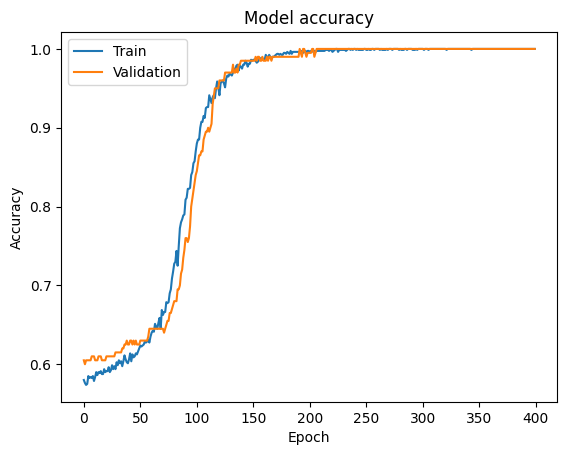

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Evaluation du modèle

In [ ]:
from mlxtend.plotting import plot_decision_regions

421/421 [==============================] - 1s 2ms/step


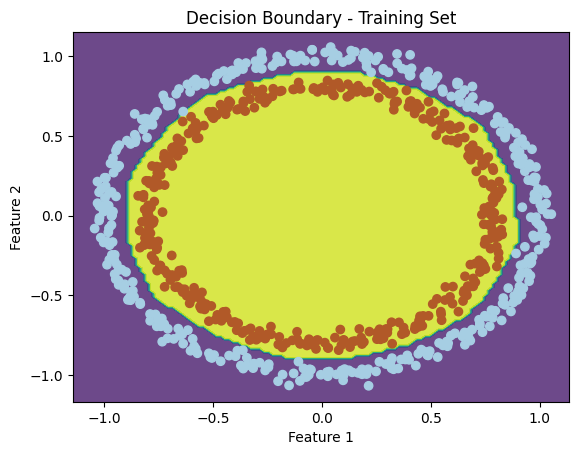

396/396 [==============================] - 2s 5ms/step


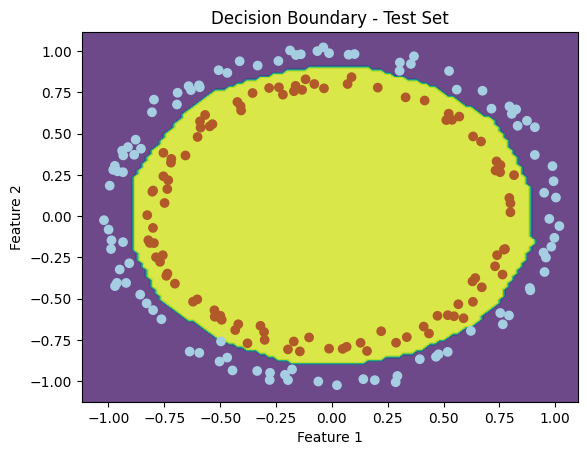

In [ ]:
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # step size in the mesh

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()


plot_decision_boundary(X_train, y_train, model, title='Decision Boundary - Training Set')


plot_decision_boundary(X_test, y_test, model, title='Decision Boundary - Test Set')


#  Multi-Classification

In [ ]:
1. Créer des données multi-classes avec make-blobs(). Nous fixons les paramètres comme
suit :
• Nombre de classes : 4
• Nombre de features : 2
• Nombre d’échantillons dans le dataset : 1000

In [ ]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=42,cluster_std=2)

In [ ]:
X.shape

(1000, 2)

In [ ]:
y.shape

(1000,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


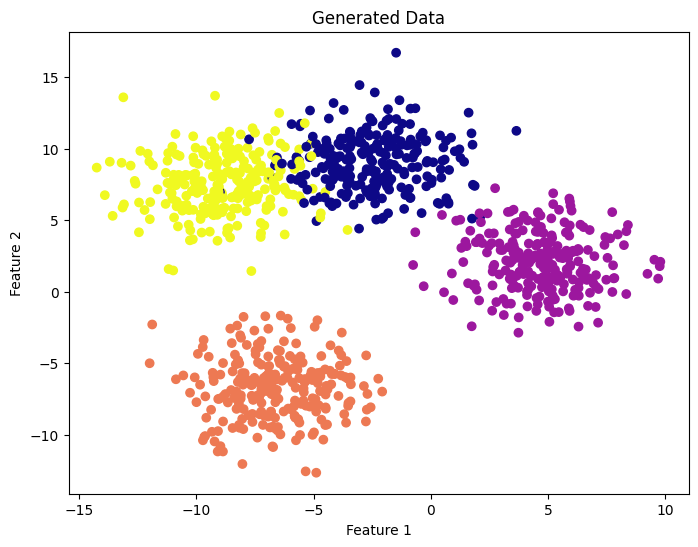

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma')
plt.title('Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Les données peuvent nécessiter à la fois des fonctions linéaires et non linéaires pour séparer les classes, en fonction de la distribution des données dans l'espace des features.
     

In [ ]:
model = Sequential()
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, input_shape=(2,), activation='relu'))
model.add(Dense(32, input_shape=(2,), activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
25/25 [==============================] - 1s 31ms/step - loss: 0.0820 - accuracy: 0.9625 - val_loss: 0.0769 - val_accuracy: 0.9750
Epoch 2/10
25/25 [==============================] - 1s 20ms/step - loss: 0.0816 - accuracy: 0.9625 - val_loss: 0.0603 - val_accuracy: 0.9750
Epoch 3/10
25/25 [==============================] - 0s 17ms/step - loss: 0.0822 - accuracy: 0.9650 - val_loss: 0.0557 - val_accuracy: 0.9750
Epoch 4/10
25/25 [==============================] - 0s 16ms/step - loss: 0.0785 - accuracy: 0.9650 - val_loss: 0.0586 - val_accuracy: 0.9750
Epoch 5/10
25/25 [==============================] - 0s 19ms/step - loss: 0.0808 - accuracy: 0.9650 - val_loss: 0.0827 - val_accuracy: 0.9650
Epoch 6/10
25/25 [==============================] - 0s 9ms/step - loss: 0.0834 - accuracy: 0.9650 - val_loss: 0.0976 - val_accuracy: 0.9650
Epoch 7/10
25/25 [==============================] - 0s 13ms/step - loss: 0.0905 - accuracy: 0.9650 - val_loss: 0.0556 - val_accuracy: 0.9750
Epoch 8/10
25/

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

7/7 [==============================] - 0s 8ms/step
Accuracy: 0.97
Precision: 0.9716090146750526
Recall: 0.97
F1 Score: 0.970219533258749
Confusion Matrix:
 [[48  0  0  1]
 [ 1 40  0  0]
 [ 0  0 53  0]
 [ 4  0  0 53]]


63880/63880 [==============================] - 123s 2ms/step


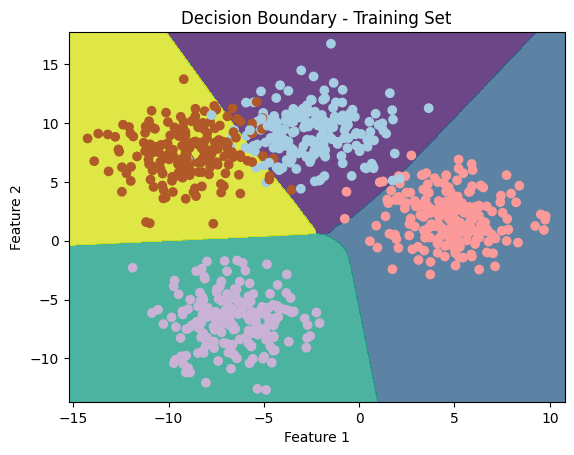

49410/49410 [==============================] - 107s 2ms/step


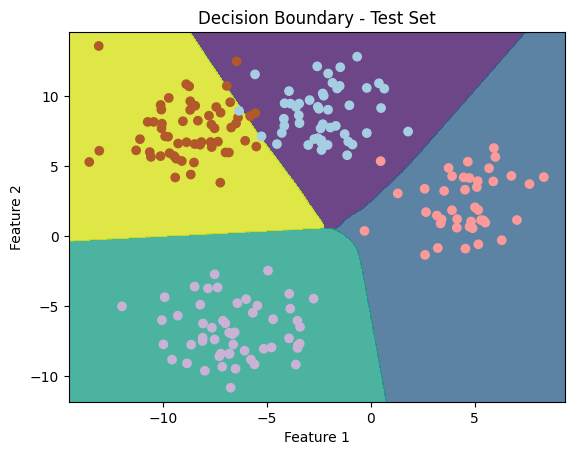

In [ ]:
def plot_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Tracer la frontière de décision pour l'ensemble d'entraînement
plot_decision_boundary(X_train, y_train, model, title='Decision Boundary - Training Set')

# Tracer la frontière de décision pour l'ensemble de test
plot_decision_boundary(X_test, y_test, model, title='Decision Boundary - Test Set')



In [ ]:
def train_and_evaluate(X_train, y_train, X_test, y_test, model):
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    return test_accuracy,test_loss

# Définir différentes tailles de dataset
sample_sizes = [500,1000,5000,10000,50000,100000,1000000]

# Entraîner le modèle pour différentes tailles de dataset et enregistrer les exactitudes
accuracies = []
for size in sample_sizes:
    print(f"for size: {size}")
    X, y = make_blobs(n_samples=size, n_features=2, centers=4, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    accuracy,error = train_and_evaluate(X_train, y_train, X_test, y_test, model)
    accuracies.append(accuracy)

for size: 500
Epoch 1/100
13/13 [==============================] - 1s 21ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 2/100
13/13 [==============================] - 0s 13ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.00

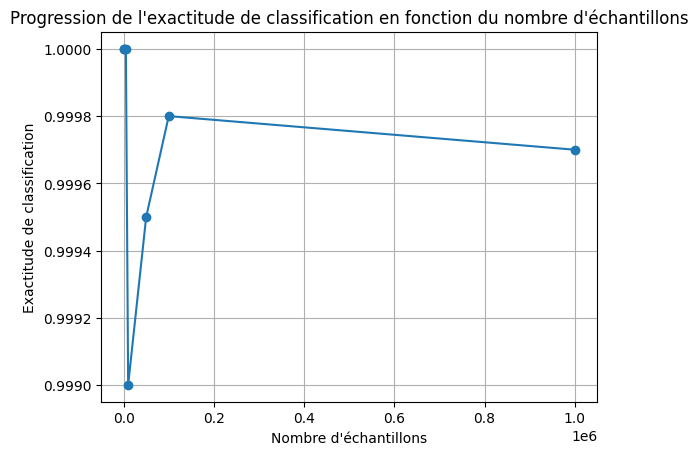

In [ ]:
plt.plot(sample_sizes, accuracies, marker='o')
plt.title('Progression de l\'exactitude de classification en fonction du nombre d\'échantillons')
plt.xlabel('Nombre d\'échantillons')
plt.ylabel('Exactitude de classification')
plt.grid(True)
plt.show()

on doit tester l'influence de :

1) number of samples

2) la variation de la variance des samples (noise) on peut aussi a chaque fois on fait varier la variance , faire le plot de decision boundary and